In [163]:
import pandas as pd                        # mainly used for datafram manipulation
import numpy as np                         # mainly used for numerical Analysis
import seaborn as sns                      # library maily used for data visualization
import matplotlib.pyplot as plt            # library for visualization
import nltk                                # Python library for NLP
import random                              # pseudo-random number generator

In [164]:
tweets_df = pd.read_csv("twitter_dataset.csv", encoding='ISO-8859-1', header=None,
           usecols = [0, 1, 5], names=['label','id', 'tweet'])

In [165]:
tweets_df.head()

,label,id,tweet
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,is upset that he can't update his Facebook by ...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,my whole body feels itchy and like its on fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all...."


In [166]:
tweets_df

,label,id,tweet
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,is upset that he can't update his Facebook by ...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,my whole body feels itchy and like its on fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
1599995,4,2193601966,Just woke up. Having no school is the best fee...
1599996,4,2193601969,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Happy 38th Birthday to my boo of alll time!!! ...


In [167]:
tweets_df.shape

(1600000, 3)

In [168]:
tweets_df.nunique()

label          2
id       1598315
tweet    1581466
dtype: int64

In [169]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   label   1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   tweet   1600000 non-null  object
dtypes: int64(2), object(1)
memory usage: 36.6+ MB


In [170]:
tweets_df.describe()

,label,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [171]:
tweets_df['tweet']

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: tweet, Length: 1600000, dtype: object

In [172]:
tweets_df=tweets_df.drop(['id'], axis=1)

In [173]:
tweets_df.head()

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


<AxesSubplot:>

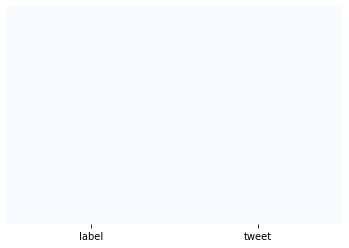

In [174]:
sns.heatmap(tweets_df.isnull(),yticklabels=False, cbar=False, cmap="Blues")

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

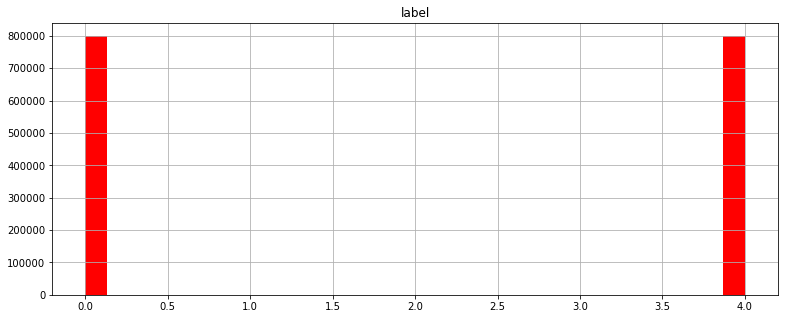

In [175]:
tweets_df.hist(bins=30, figsize=(13,5), color='r')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

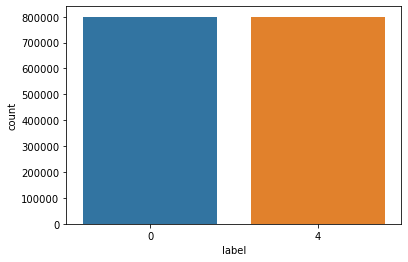

In [176]:
sns.countplot(tweets_df['label'], label='Count')

In [177]:
tweets_df['length']= tweets_df['tweet'].apply(len)

In [178]:
tweets_df.head()

,label,tweet,length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


<AxesSubplot:ylabel='Frequency'>

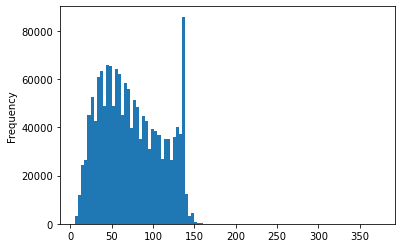

In [179]:
tweets_df['length'].plot(bins=100, kind='hist')

In [180]:
tweets_df.describe()

,label,length
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,7.409011e+01
std,2.000001e+00,3.644114e+01
min,0.000000e+00,6.000000e+00
25%,0.000000e+00,4.400000e+01
50%,2.000000e+00,6.900000e+01
75%,4.000000e+00,1.040000e+02
max,4.000000e+00,3.740000e+02


In [181]:
# let's see the shortest message
tweets_df[tweets_df['length']==6]['tweet'].iloc[0]

' just '

In [287]:
# view the message with the average length
tweets_df[tweets_df['length']==22]['tweet'].iloc[0]

'im sad now  Miss.Lilly'

In [288]:
positive_tweets=tweets_df[tweets_df['label']==4]

In [184]:
positive_tweets.head()

,label,tweet,length
800000,4,I LOVE @Health4UandPets u guys r the best!!,44
800001,4,im meeting up with one of my besties tonight! ...,72
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S...",137
800003,4,Being sick can be really cheap when it hurts t...,104
800004,4,@LovesBrooklyn2 he has that effect on everyone,47


KeyError: 0

In [202]:
len(positive_tweets)

800000

In [185]:
negative_tweets=tweets_df[tweets_df['label']==0]

In [269]:
negative_tweets.head()

,label,tweet,length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [270]:
len(negative_tweets)

800000

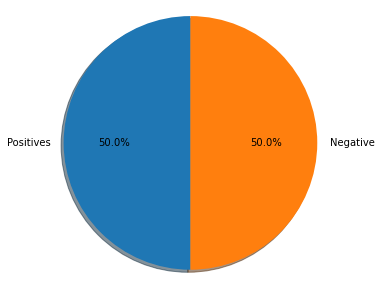

In [271]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(positive_tweets), len(negative_tweets)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

In [290]:
print('Number of positive tweets: ', len(positive_tweets))
print('Number of negative tweets: ', len(negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(positive_tweets))


Number of positive tweets:  800000
Number of negative tweets:  800000

The type of all_positive_tweets is:  <class 'pandas.core.frame.DataFrame'>


In [ ]:
positiv

In [284]:
import random                              # pseudo-random number generator

In [285]:
# print positive in greeen
print('\033[92m' + positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + negative_tweets[random.randint(0,5000)])

KeyError: 2266

In [286]:
sentences = tweets_df['tweet'].tolist()

In [188]:
sentences

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ',
 "spring break in plain city... it's snowing ",
 'I just re-pierced my ears ',
 "@caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . .",
 '@octolinz16 It it counts, idk why I did either. you never talk to me anymore ',
 "@smarrison i wo

In [189]:
len(sentences)

1600000

In [190]:
sentences_as_one_string = " ".join(sentences)

In [191]:
!pip install WordCloud

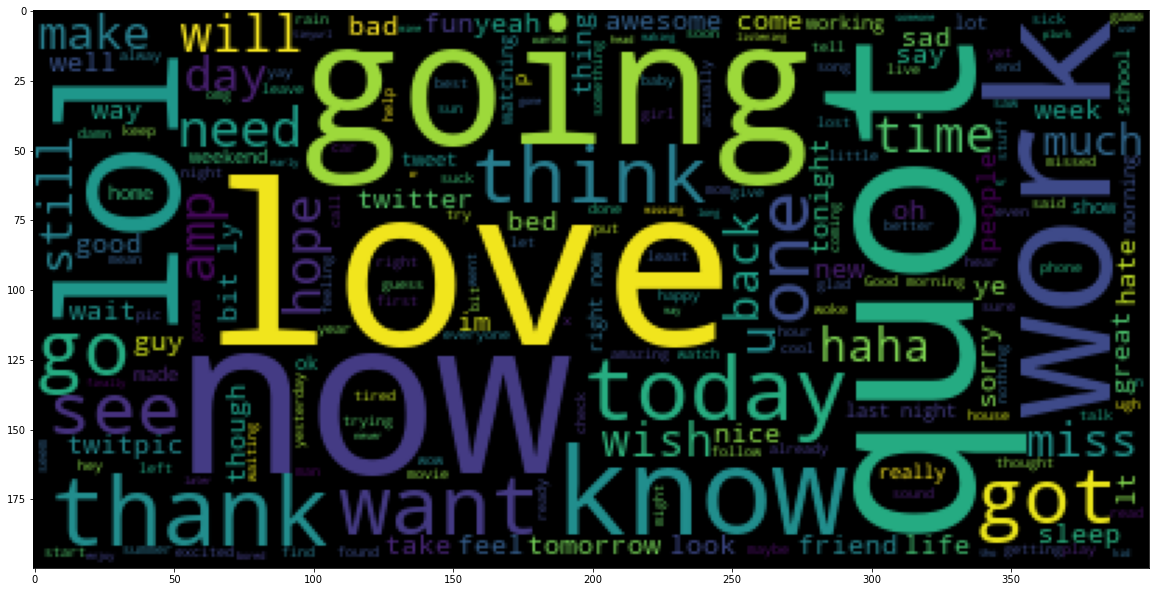

In [193]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

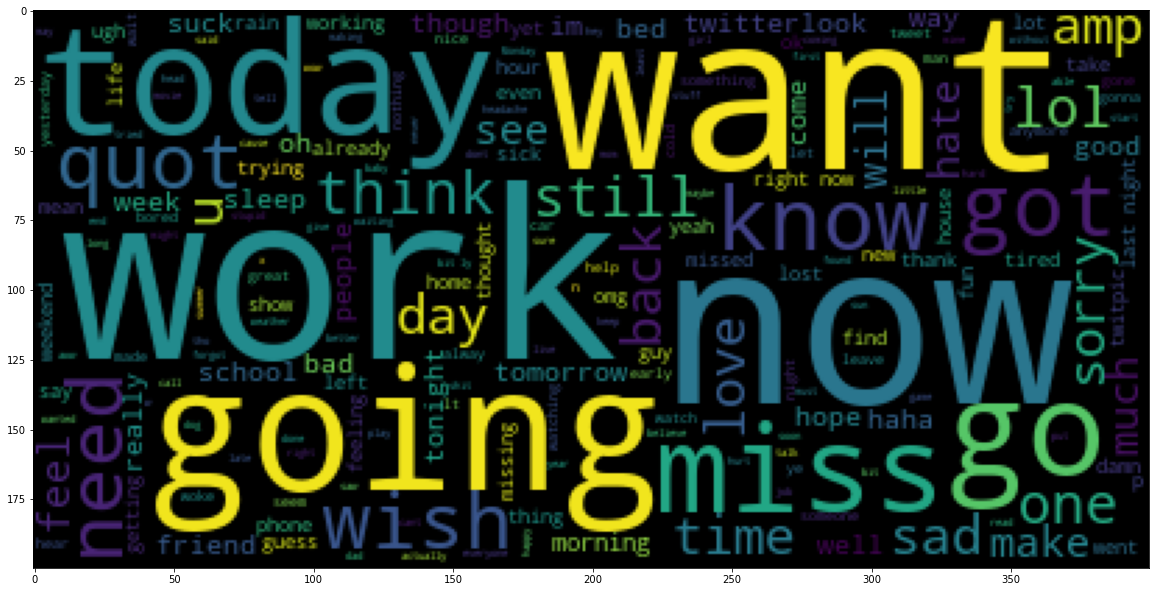

In [194]:
negative_list=negative_tweets['tweet'].tolist()
negative_sentences_as_one_string=" ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

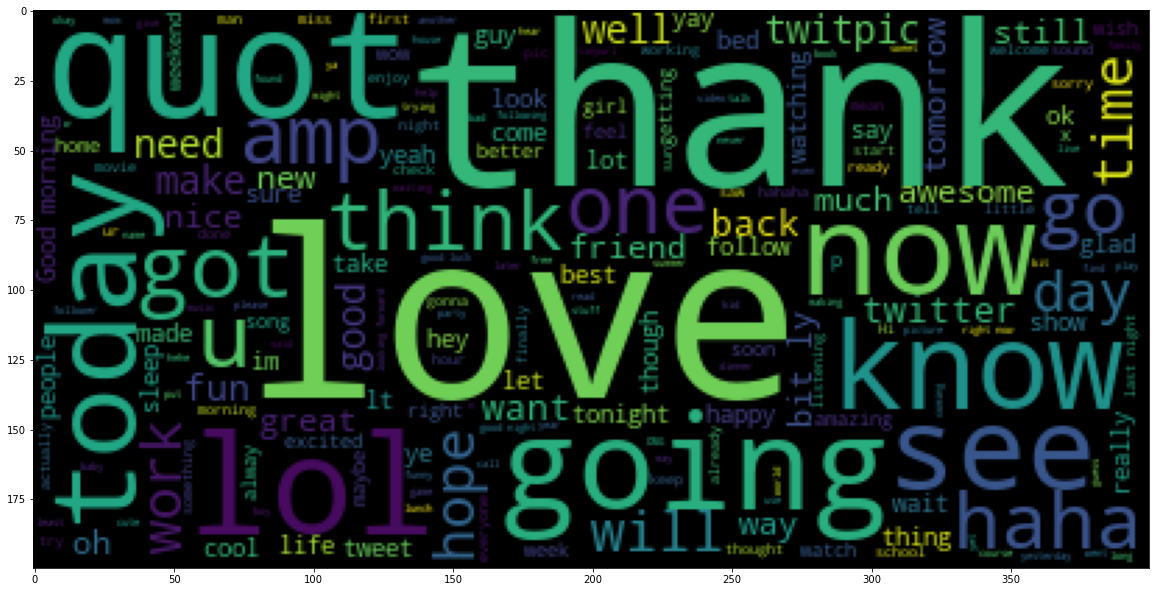

In [195]:
positive_list=positive_tweets['tweet'].tolist()
positive_sentences_as_one_string=" ".join(positive_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_sentences_as_one_string))

# Preprocess raw text for Sentiment analysis
Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

1. Tokenizing the string
2. Lowercasing
3. Removing stop words and punctuation
4. Stemming



In [236]:
!pip install nltk

In [249]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [250]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [251]:
Test = "good morning beautiful people :).... i am having fun learning a machine leaning and AI !"

In [252]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]

In [253]:
Test_punc_removed

['g',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'i',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 ' ',
 'm',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I',
 ' ']

In [254]:
Test_punc_removed_join="".join(Test_punc_removed)

In [255]:
Test_punc_removed_join

'good morning beautiful people  i am having fun learning a machine leaning and AI '

Remove punctuation using different method

In [256]:
# Test_punc_removed_join=[]
# for char in Test:
#     if char not in string.punctuation:
#         Test_punc_removed.append(char)

# Test_punc_removed_join= "".join(Test_punc_removed)
# Test_punc_removed_join

In [257]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [258]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [259]:
Test_punc_removed_join_clean= [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [260]:
Test_punc_removed_join_clean

['good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'machine',
 'leaning',
 'AI']

for the following text , create a pipeline to remove punctuation followed by removing stopwords

In [261]:
mini_challenge="Here is a mini challenge , that will teach you how to remove stopwords and punctuations!"

In [267]:
challenge=[char for char in mini_challenge if char not in string.punctuation]
challenge="".join(challenge)
challenge=[word for word in challenge.split() if word.lower() not in stopwords.words('english')]

In [268]:
challenge

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

# Tokenization (Count Vectorizer)